In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# Очистка датасета 

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   author              2280 non-null   object 
 1   gender              2280 non-null   object 
 2   text                2280 non-null   object 
 3   title_of_textbook   358 non-null    object 
 4   kind_of_literature  2268 non-null   object 
 5   year                2276 non-null   object 
 6   genre               2277 non-null   object 
 7   whole               2244 non-null   object 
 8   retelling           2276 non-null   object 
 9   start_of_textbook   376 non-null    object 
 10   compiler           2275 non-null   object 
 11  place_of_edition    2275 non-null   object 
 12  year_of_edition     2275 non-null   float64
 13  level_of_education  1099 non-null   object 
 14  kind_of_book        2275 non-null   object 
 15  part_of_edition     1517 non-null   object 
 16  notes 

In [351]:
def probel(x):
    if ' ' in str(x):
        return x.strip()
    else:
        return x
    
for i in data.columns:
    data[i] = data[i].apply(probel)

In [352]:
def under(x):
    if 'underf' in str(x) or 'ndef' in str(x) or '' == str(x):
        return np.nan
    else:
        return x
for i in data.columns:
    data[i] = data[i].apply(under)

In [353]:
data['author'] = data['author'].apply(lambda x : x[:x.find('.')+1] + x[x.find('.')+2:] if '.' in str(x) else x)

In [354]:
data.to_excel('данные_обновление.xlsx')

In [2]:
data = data.fillna('undefined')

In [31]:
# Сколько у нас уникальных авторов - без фольклора и без нанов
data[~data['author'].isin(['undefined', 'фольклор'])]['author'].nunique()

313

In [32]:
# Сколько уникальных произведений - с фольклрором без нанов
data[~data['author'].isin(['undefined'])]['text'].nunique()

1268

In [34]:
data['kind_of_literature'].value_counts(normalize=True)*100

поэзия          51.271930
проза           45.570175
undefined        1.798246
драма            1.140351
критика          0.131579
публицистика     0.087719
Name: kind_of_literature, dtype: float64

# Обычный топ - просто частота - 20

In [13]:
top_20 = data[data['author']!='undefined']['author'].value_counts()[0:20]

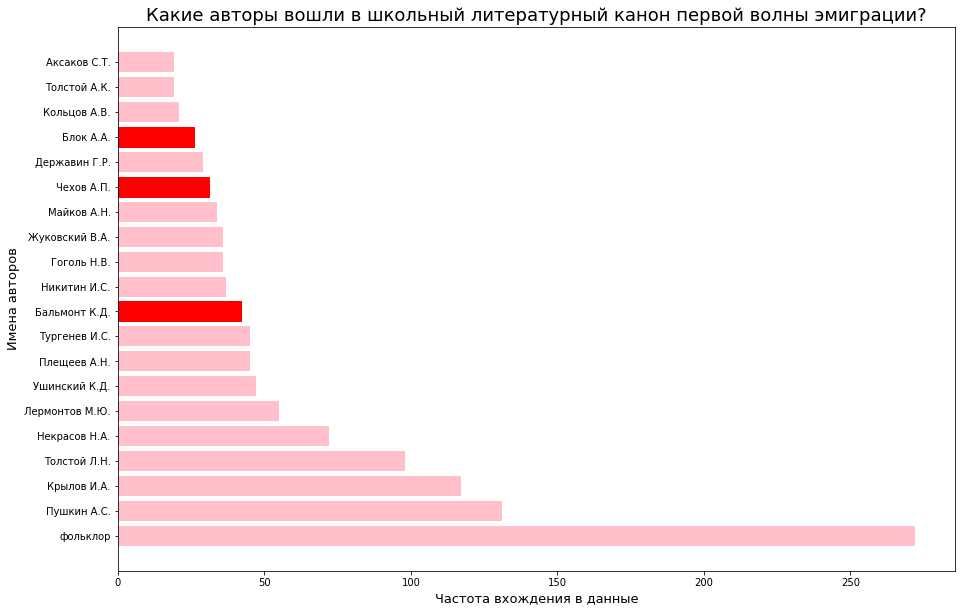

In [21]:
fig, ax = plt.subplots(figsize=[15,10])
top_20 = data[data['author']!='undefined']['author'].value_counts()[0:20]
ax.barh(data[data['author']!='undefined']['author'].value_counts()[0:20].index, data[data['author']!='undefined']['author'].value_counts()[0:20], color = 'pink')
ax.set_title('Какие авторы вошли в школьный литературный канон первой волны эмиграции?', fontsize=18)
ax.set_ylabel('Имена авторов', fontsize=13)
ax.set_xlabel('Частота вхождения в данные', fontsize=13)
for i in data[data['author']!='undefined']['author'].value_counts()[0:20].index:
    if i in peers[peers['author']!='undefined']['author'].to_list() and i not in ['Пушкин А.С.', 'Тургенев И.С.', 'Никитин И.С.']:
        ax.patches[(data[data['author']!='undefined']['author'].value_counts()[0:20].index).to_list().index(i)].set_color('red')
plt.show()

# Популярные по вхождению в разные хрестоматиии

In [29]:
df=pd.DataFrame(columns=['author', 'count'])
for i in data[data['author']!='undefined']['author'].unique():
    df.loc[ len(df.index )] = [i, data[data['author'] == i][[' compiler', 'kind_of_book']].value_counts().rename({'kind_of_book':'count'}).reset_index()['kind_of_book'].shape[0]]

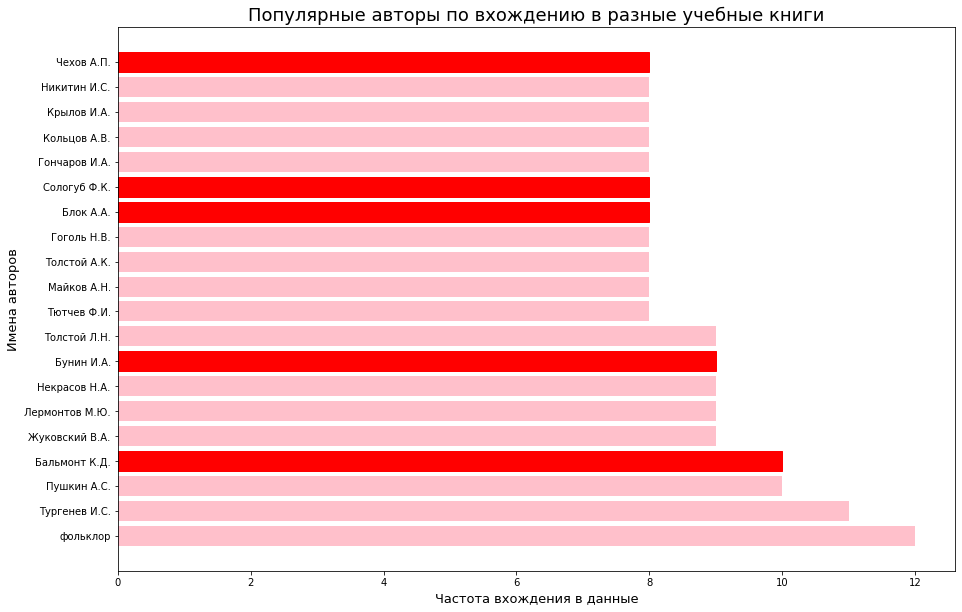

In [35]:
df=df.sort_values('count', ascending=False)[0:20]
fig, ax = plt.subplots(figsize=[15,10])
ax.barh(df['author'], df['count'], color = 'pink')
ax.set_title('Популярные авторы по вхождению в разные учебные книги', fontsize=18)
ax.set_ylabel('Имена авторов', fontsize=13)
ax.set_xlabel('Частота вхождения в данные', fontsize=13)
for i in df['author'].to_list():
    if i in peers['author'].to_list() and i not in ['Пушкин А.С.', 'Тургенев И.С.', 'Никитин И.С.', 'Крылов И.А', 'Тютчев Ф.И.']:
        ax.patches[(df['author']).to_list().index(i)].set_color('red')
plt.show()

# Частота произведений авторов популярных в топе ВЫШЕ

In [8]:
df_top=pd.DataFrame(columns=['author', 'text', 'count'])
for i in data['author'].unique():
    for item in data[data['author'] == i]['text'].unique():
        df_top.loc[ len(df_top.index )] = [i,  item, data[(data['author'] == i) & (data['text'] == item)].shape[0]]

In [9]:
df_top

,author,text,count
0,фольклор,"За рекою, за быстрою",4
1,фольклор,песни бытовые,4
2,фольклор,"Не шуми, мати, зеленая дубравушка",1
3,фольклор,"Солнце, Мороз и Ветер",1
4,фольклор,Морозко,5
...,...,...,...
1659,Лацис В.,Большой улов,1
1660,Сиповский В.,Единоборство,1
1661,Волкова Е.,Первый русский печатник,1
1662,Ключевский В.,Придворный учитель,1


In [16]:
df_top = df_top[df_top['author'].isin(top_20.index)]

In [17]:
df_top.to_excel('частота_произведений_20_популярных_авторов.xlsx')

# Современники

In [18]:
def now_time(x):
    try:
        x = float(x)
    except ValueError:
        if  '-' in x and int(x.split('-')[1]) >= 1895:
            return 1
        else:
            return 0
    else:
        if x >= 1895:
            return 1
        else:
            return 0

data['peers_authors'] = data['year'].apply(now_time)

In [19]:
data['peers_authors'].value_counts()

0    2044
1     236
Name: peers_authors, dtype: int64

# топ-10 современников - ОБЩАЯ ЧАСТОТА И ПОПУЛЯРНОСТЬ

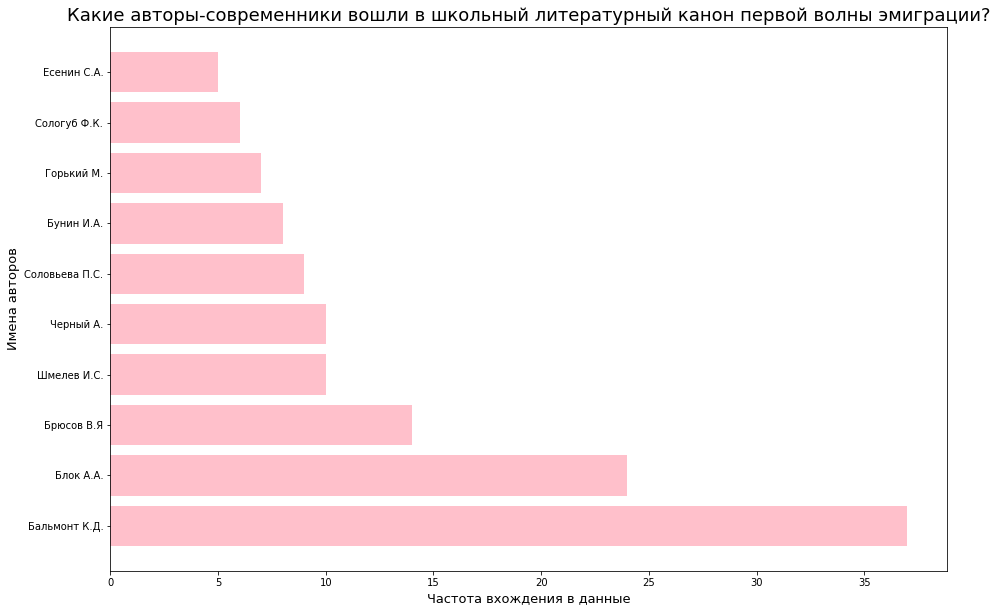

In [20]:
fig, ax = plt.subplots(figsize=[15,10])
peers = data[(data['peers_authors'] == 1) & (~data['author'].str.contains('Короленко')) &  (~data['author'].str.contains('Мамин'))]
peers_top = peers['author'].value_counts()[0:10]
ax.barh(peers_top.index, peers_top, color = 'pink')
ax.set_title('Какие авторы-современники вошли в школьный литературный канон первой волны эмиграции?', fontsize=18)
ax.set_ylabel('Имена авторов', fontsize=13)
ax.set_xlabel('Частота вхождения в данные', fontsize=13)
plt.show()

# ТОП - 10 СОВРЕМЕННИКОВ ВХОДИВШИХ В РАЗНЫЕ ХРЕСТОМАТИИ

In [67]:
df_peers=pd.DataFrame(columns=['author', 'count'])
peers_data = peers
for i in peers_data['author'].unique():
    df_peers.loc[ len(df_peers.index )] = [i, peers_data[peers_data['author'] == i][[' compiler', 'kind_of_book']].value_counts().rename({'kind_of_book':'count'}).reset_index()['kind_of_book'].shape[0]]

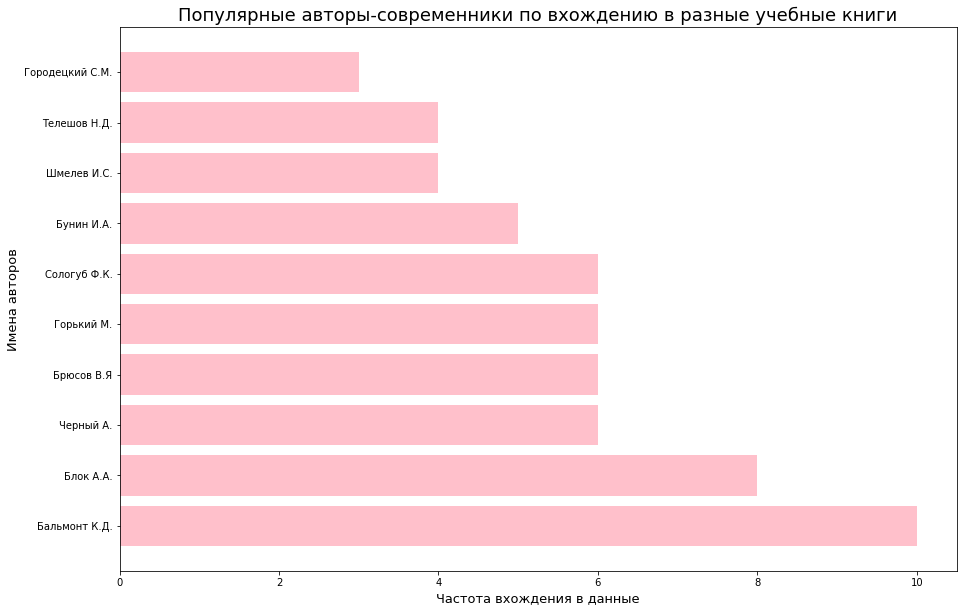

In [68]:
df_peers=df_peers.sort_values('count', ascending=False)[0:10]
fig, ax = plt.subplots(figsize=[15,10])
ax.barh(df_peers['author'], df_peers['count'], color = 'pink')
ax.set_title('Популярные авторы-современники по вхождению в разные учебные книги', fontsize=18)
ax.set_ylabel('Имена авторов', fontsize=13)
ax.set_xlabel('Частота вхождения в данные', fontsize=13)
plt.show()

# Частота произведений авторов-современников популярных в топе ВЫШЕ

In [250]:
df_top_peers=pd.DataFrame(columns=['author', 'text', 'count'])
for i in peers['author'].unique():
    for item in peers[peers['author'] == i]['text'].unique():
        df_top_peers.loc[ len(df_top_peers.index )] = [i,  item, peers[(peers['author'] == i) & (peers['text'] == item)][[' compiler', 'kind_of_book']].value_counts().rename({'kind_of_book':'count'}).reset_index()['kind_of_book'].shape[0]]

In [251]:
df_top_peers = df_top_peers[df_top_peers['author'].isin(df_peers['author'])]

In [252]:
df_top_peers.to_excel('частота_произведений_10_популярных_авторов_современников.xlsx')

In [225]:
data.to_excel('Новая версия_данные_даши.xlsx')

# Доля женщин

In [409]:
data[(~data['author'].isna()) & (data['author']!='фольклор')]['gender'].value_counts()

м    1632
ж      61
э       1
Name: gender, dtype: int64

In [45]:
data['gender'] = data['gender'].apply(lambda x : 'ж' if x == 'э' else x)

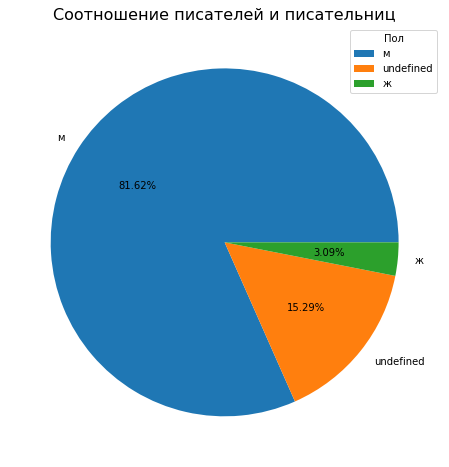

In [46]:
fig, ax = plt.subplots(figsize=[12,8])
ax.pie(data[(~data['author'].isna()) & (data['author']!='фольклор')]['gender'].value_counts(), labels = data[(~data['author'].isna()) & (data['author']!='фольклор')]['gender'].value_counts().index, autopct='%.2f%%')
ax.set_title('', fontsize=16)
ax.set_title('Соотношение писателей и писательниц', fontsize=16)
ax.legend(title = 'Пол')
sns.color_palette("blend:#EDA", as_cmap=True)
plt.show()

# топ-10 женщин писателей (обычный топ)

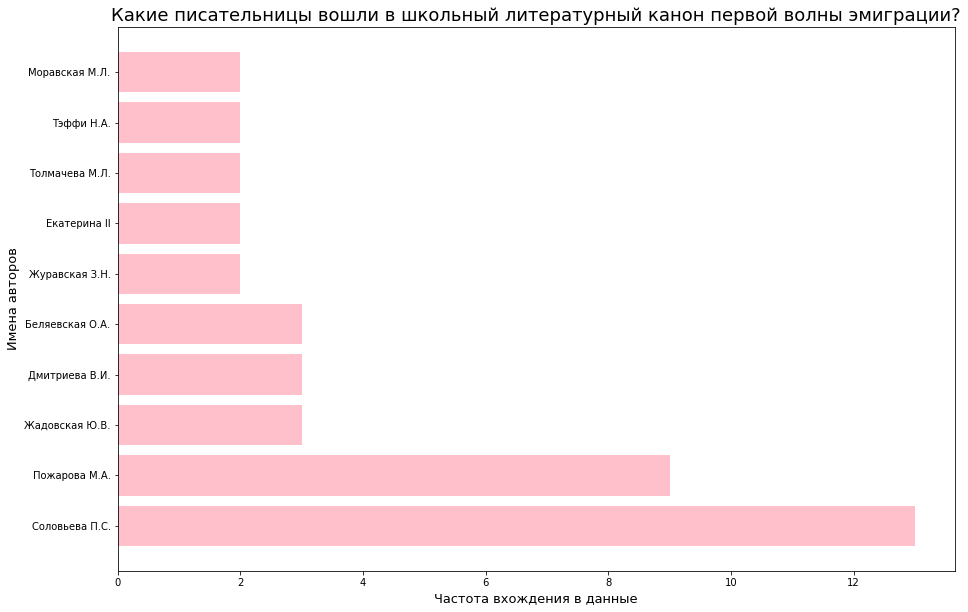

In [48]:
fig, ax = plt.subplots(figsize=[15,10])
women = data[(data['gender'] == 'ж') & (~data['author'].isna()) & (data['author']!='фольклор')]
women_top = women['author'].value_counts()[0:10]
ax.barh(women_top.index, women_top, color = 'pink')
ax.set_title('Какие писательницы вошли в школьный литературный канон первой волны эмиграции?', fontsize=18)
ax.set_ylabel('Имена авторов', fontsize=13)
ax.set_xlabel('Частота вхождения в данные', fontsize=13)
plt.show()

In [40]:
# произведения Соловьевой
data[data['author'].str.contains('Соловьева')]['text']

278                   Там
909                В лесу
916                 Мошки
927            Подснежник
931      Бабушка и внучка
934     Колыбельная песня
1284                Мошки
1704    Колыбельная песня
1796               Грибок
1840           Подснежник
1863         Троицын день
2081                Орехи
2121         Светлый день
Name: text, dtype: object

# топ-10 женщин входивших в разные хрестоматии (уник вхождение)

In [49]:
df_women = pd.DataFrame(columns=['author', 'count'])
for i in women['author'].unique():
    df_women.loc[ len(df_women.index )] = [i, women[women['author'] == i][[' compiler', 'kind_of_book']].value_counts().rename({'kind_of_book':'count'}).reset_index()['kind_of_book'].shape[0]]

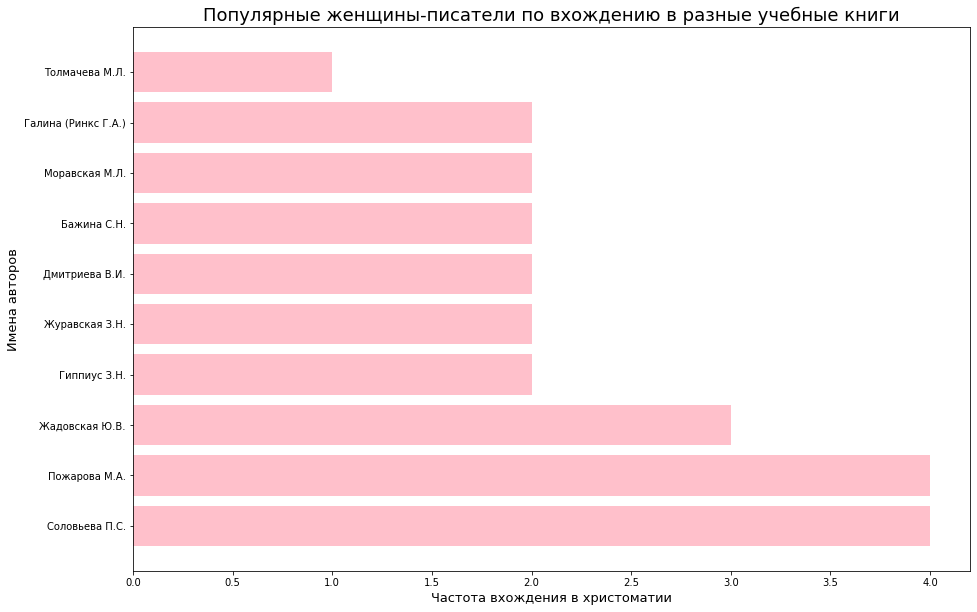

In [50]:
df_women=df_women.sort_values('count', ascending=False)[0:10]
fig, ax = plt.subplots(figsize=[15,10])
ax.barh(df_women['author'], df_women['count'], color = 'pink')
ax.set_title('Популярные женщины-писатели по вхождению в разные учебные книги', fontsize=18)
ax.set_ylabel('Имена авторов', fontsize=13)
ax.set_xlabel('Частота вхождения в христоматии', fontsize=13)
plt.show()

In [115]:
data.to_excel('Новая версия_данные_даши.xlsx')

# Cравнения

In [4]:
import pandas as pd

In [3]:
data=pd.read_excel('Школьный литературный канон первой волны эмиграции.xlsx')

In [5]:
data

""


In [4]:
dorev = pd.read_csv('доревол.csv')
sovet = pd.read_csv('советск.csv')

In [6]:
data['text_1']=data['text'].apply(lambda x: x.strip().replace('!', '').replace('...', '').replace(':', ''))

In [7]:
dorev['text_1']=dorev['text'].apply(lambda x: x.strip().replace('!', '').replace('...', '').replace(':', ''))

In [8]:
sovet['text_1']=sovet['title'].apply(lambda x: str(x).strip().replace('!', '').replace('...', '').replace(':', ''))

In [9]:
def two_author(i, a):
    if len(data[data['text']==i]['author'].unique()) > 1:
        return i+' ('+a+')'
    else:
        return i
dorev['text_1'] = dorev[['text_1', 'author']].apply(lambda dorev:two_author(dorev['text_1'], dorev['author']), axis=1)

In [13]:
data = data.fillna('undefined')

In [10]:
data['text_1'] = data[['text_1', 'author']].apply(lambda data:two_author(data['text_1'], data['author']), axis=1)

In [11]:
sovet['text_1'] = sovet[['text_1', 'author']].apply(lambda sovet:two_author(sovet['text_1'], sovet['author']), axis=1)

In [16]:
len(pd.Series(list(set(data['text_1'].value_counts().index) & (set(dorev['text_1'].value_counts().index)))))

389

In [18]:
len(set(data['text_1'].value_counts().index))

1660

In [56]:
oper = pd.Series(list(set(data['text_1'].value_counts().index) & (set(dorev['text_1'].value_counts().index) - set(sovet['text_1'].value_counts().index))))

AttributeError: 'Series' object has no attribute 'toDataFrame'

In [62]:
data[(data['text_1'].isin(oper))][['author','text_1']].drop_duplicates().to_excel('pr.xlsx')

In [26]:
data['text_1'].value_counts()[200:250]

Осень (Бальмонт К.Д.)                 2
В поезде                              2
Бедные люди                           2
Как у наших у ворот                   2
Царевна-лягушка                       2
Вишня                                 2
Первая книжка                         2
Отчего зло на свете                   2
Сиротка Ваня                          2
Акула                                 2
Колыбельная песня (Соловьева П.С.)    2
Смерть Олега                          2
В парке плакала девочка               2
Кукла и котик                         2
Лошадиная фамилия                     2
Каштанка                              2
Крылья                                2
Нить Ариадны                          2
В лесу (Городецкий С.М.)              2
Про кота                              2
Мокрый щенок                          2
Подснежник (Соловьева П.С.)           2
Мошки                                 2
Снежинки                              2
Листопад (Минский Н.М.)               2


In [27]:
389/1660*100

23.433734939759034

In [25]:
data['text_1'].value_counts()

евгений онегин                     28
илья муромец                       17
мертвые души                       16
осень                              15
детство                            14
                                   ..
плоты                               1
русалки                             1
обычаи этих племен                  1
была бы охота - выучиться можно     1
слезы зимы                          1
Name: text_1, Length: 1504, dtype: int64

In [12]:
same = pd.Series(list(set(data['text_1'].value_counts()[0:20].index) & (set(dorev['text_1'].value_counts()[0:20].index))))
same

0              Мертвые души
1            Евгений Онегин
2                   Обломов
3    Детство (Толстой Л.Н.)
dtype: object

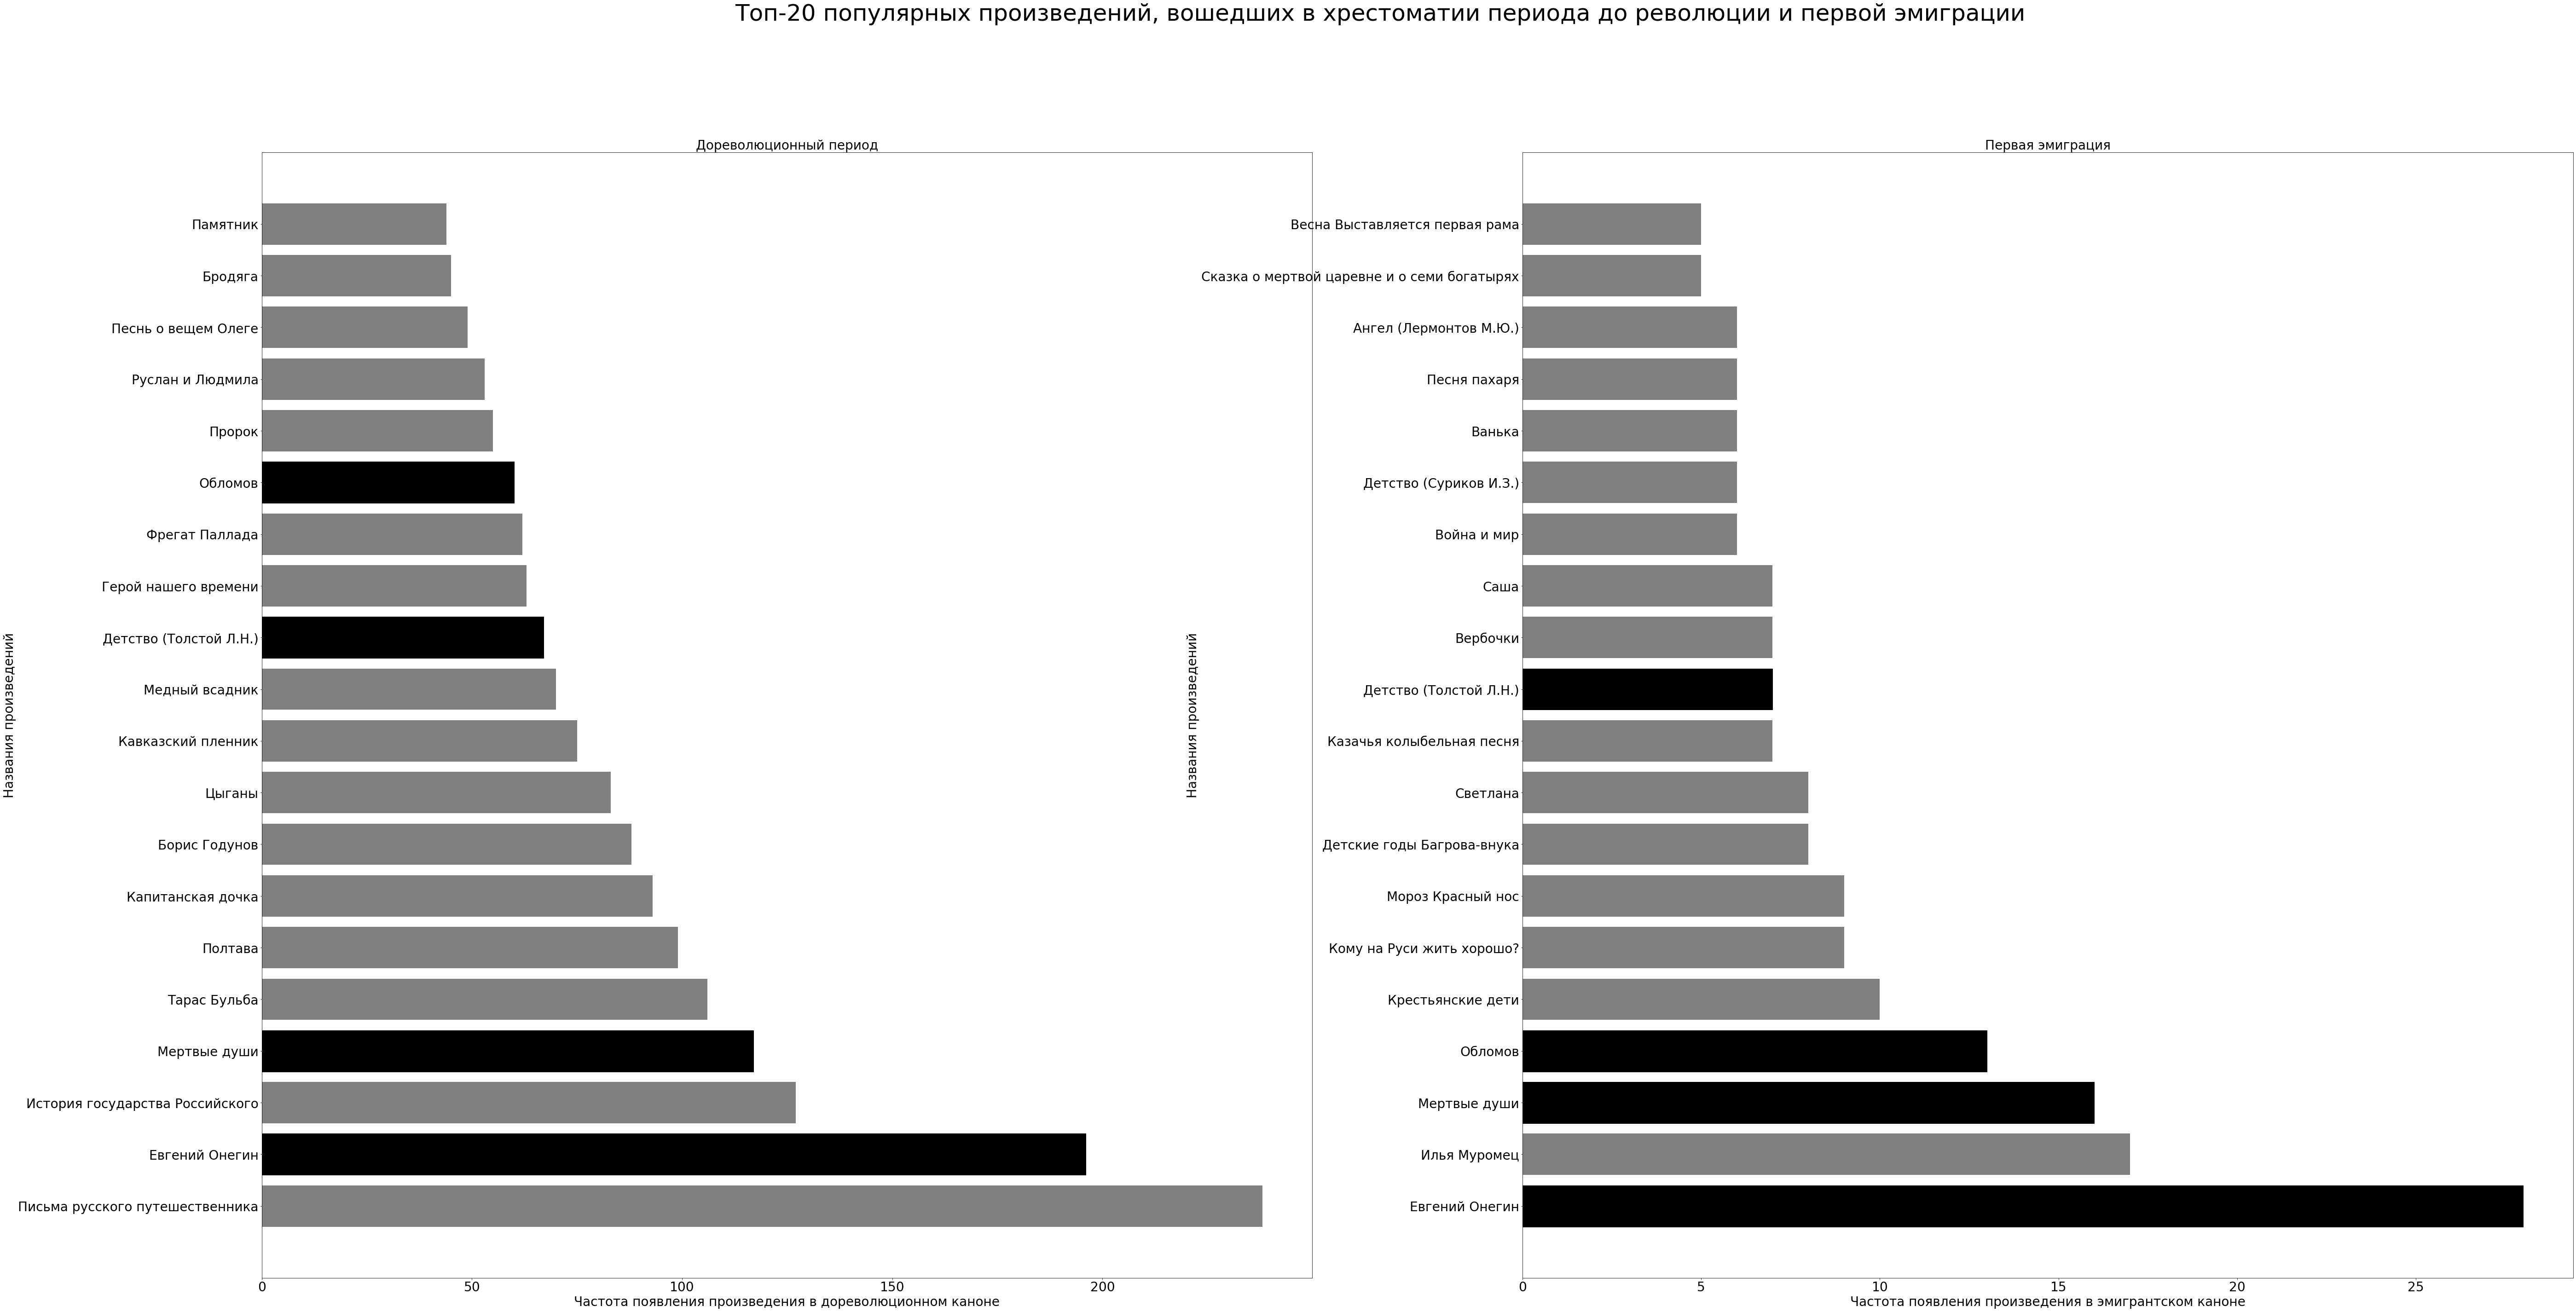

In [23]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize=[90, 45] )
fig.suptitle('Топ-20 популярных произведений, вошедших в хрестоматии периода до революции и первой эмиграции', fontsize=50)
plt.rc('font', size= 28) 
#add data to plots
axs[0].barh(dorev['text_1'].value_counts()[0:20].index, dorev['text_1'].value_counts()[0:20], color = 'grey')
axs[0].set_title('Дореволюционный период', fontsize=28)
axs[0].set_ylabel('Названия произведений', fontsize=28)
axs[0].set_xlabel('Частота появления произведения в дореволюционном каноне', fontsize=28)
for i in dorev['text_1'].value_counts()[0:20].index:
    if i in same.to_list():
        axs[0].patches[(dorev['text_1'].value_counts()[0:20].index).to_list().index(i)].set_color('black')


axs[1].barh(data['text_1'].value_counts()[0:20].index, data['text_1'].value_counts()[0:20], color = 'grey')
axs[1].set_title('Первая эмиграция', fontsize=28)
axs[1].set_ylabel('Названия произведений', fontsize=28)
axs[1].set_xlabel('Частота появления произведения в эмигрантском каноне', fontsize=28)
for i in data['text_1'].value_counts()[0:20].index:
    if i in same.to_list():
        axs[1].patches[(data['text_1'].value_counts()[0:20].index).to_list().index(i)].set_color('black')

plt.savefig('dorev_our.jpeg')

## Дорев

### Доля одинаковых произведений - доделать когда исправлю все произведения

In [8]:
a = list()
for i in dorev['text'].unique():
    i = i.strip().lower().replace(' ', '').replace('!', '').replace('...', '').replace(':', '')
    a.append(i)

In [9]:
b = list()
for i in data['text'].unique():
    i = i.strip().lower().replace(' ', '').replace('!', '').replace('...', '').replace(':', '')
    b.append(i)

In [263]:
pd.Series(list(set(a) & set(b))).to_frame()

,0
0,песняосоколе
1,воробей
2,сенокос
3,воздушныйкорабль
4,ревизор
...,...
386,мельник
387,наволге
388,ивиковыжуравли
389,ангел


In [257]:
# 26.3% - это сколько произведений ИЗ НАШЕГО ДАТАСЕТА СОВПАДАЮТ С ДОРЕВОМ
391/len(data['text'].unique())*100

26.365475387727578

### Попялурные авторов - топ-20 обычный

In [71]:
# одинаковые - 
same = pd.Series(list(set(top_20.index) & (set(dorev['author'].value_counts()[0:20].index))))
same

0       Кольцов А.В.
1      Державин Г.Р.
2        Пушкин А.С.
3      Некрасов Н.А.
4     Жуковский В.А.
5        Гоголь Н.В.
6     Лермонтов М.Ю.
7        Майков А.Н.
8      Тургенев И.С.
9        Крылов И.А.
10      Толстой Л.Н.
11      Толстой А.К.
12      Никитин И.С.
dtype: object

In [72]:
# те, которые не ПОХОЖИ
pd.Series(list(set(data['author']) - (set(dorev['author'].value_counts().index))))

0           Екатерина II
1            Медведев Л.
2             Митчель Л.
3                Лебедев
4           Аксаков К.С.
             ...        
228           Рощин Н.Я.
229            Марков Е.
230    Крандиевская Н.В.
231              Беранже
232             Льдов К.
Length: 233, dtype: object

# красным отмечены сходства!

# обычный топ-20

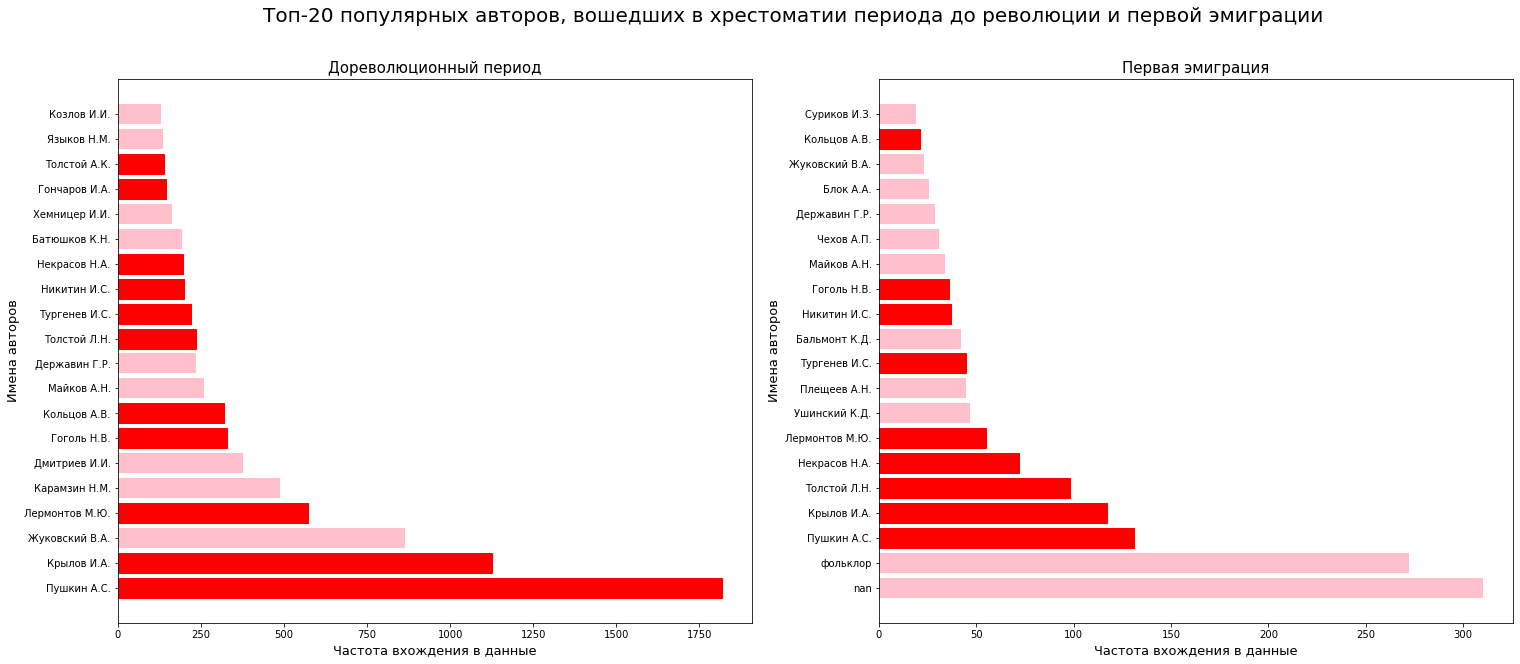

In [383]:
fig, axs = plt.subplots(nrows= 1 , ncols= 2, figsize=[25, 10] )
fig.suptitle('Топ-20 популярных авторов, вошедших в хрестоматии периода до революции и первой эмиграции', fontsize=20)

#add data to plots
axs[0].barh(dorev['author'].value_counts()[0:20].index, dorev['author'].value_counts()[0:20], color = 'pink')
axs[0].set_title('Дореволюционный период', fontsize=15)
axs[0].set_ylabel('Имена авторов', fontsize=13)
axs[0].set_xlabel('Частота вхождения в данные', fontsize=13)
for i in dorev['author'].value_counts()[0:20].index:
    if i in same.to_list():
        axs[0].patches[(dorev['author'].value_counts()[0:20].index).to_list().index(i)].set_color('red')


axs[1].barh(top_20.index, top_20, color = 'pink')
axs[1].set_title('Первая эмиграция', fontsize=15)
axs[1].set_ylabel('Имена авторов', fontsize=13)
axs[1].set_xlabel('Частота вхождения в данные', fontsize=13)
for i in top_20.index:
    if i in same.to_list():
        axs[1].patches[(top_20.index).to_list().index(i)].set_color('red')

plt.show()

In [326]:
# Гипотеза:
author_90_12 = dorev[(dorev['year'] >= 1890) & (dorev['year'] <=1912)]['author']

In [335]:
# 75 из 142
len(set(author_90_12)&set(data['author'].to_list()))

75

In [337]:
set(author_90_12)&set(data['author'].to_list())

{'Аксаков И.С.',
 'Аксаков С.Т.',
 'Апухтин А.Н.',
 'Баратынский Е.А.',
 'Белинский В.Г.',
 'Берг Н.В.',
 'Богданов М.',
 'Величко В.Л.',
 'Вяземский П.А.',
 'Гарин-Михайловский Н.Г.',
 'Гаршин В.М.',
 'Гоголь Н.В.',
 'Гончаров И.А.',
 'Горький М.',
 'Греков Н.П.',
 'Грибоедов А.С.',
 'Григорович Д.В.',
 'Грот Я.К.',
 'Даль В.И.',
 'Данилевский Г.П.',
 'Державин Г.Р.',
 'Дмитриев И.И.',
 'Достоевский Ф.М.',
 'Дрожжин С.Д.',
 'Жадовская Ю.В.',
 'Жемчужников А.М.',
 'Жуковский В.А.',
 'Загоскин М.Н.',
 'Засодимский П.В.',
 'Измайлов А.Е.',
 'Кантемир А.Д.',
 'Карамзин Н.М.',
 'Козлов И.И.',
 'Кольцов А.В.',
 'Коринфский А.А.',
 'Короленко В.Г.',
 'Крылов И.А.',
 'Лермонтов М.Ю.',
 'Лесков Н.С.',
 'Ломоносов М.В.',
 'Майков А.Н.',
 'Мамин-Сибиряк Д.Н.',
 'Мей Л.А.',
 'Михайлов А.К.',
 'Модзалевский Л.Н.',
 'Надсон С.Я.',
 'Некрасов Н.А.',
 'Никитин И.С.',
 'Огарев Н.П.',
 'Одоевский В.Ф.',
 'Озеров В.А.',
 'Островский А.Н.',
 'Писемский А.Ф.',
 'Плещеев А.Н.',
 'Полонский Я.П.',
 'Пушкин 

# Совет

In [405]:
# были и там и там (с 1986)
sovet['year'] = sovet['year'].apply(lambda x: 0 if x == '1937-38' else int(x))
# оставить современников
a = sovet[(sovet['year'] >= 1986)]
set(a['author'].unique()) & set(data['author'].unique()) 

{nan,
 'Баратынский Е.А.',
 'Белинский В.Г.',
 'Белый А.',
 'Блок А.А.',
 'Бунин И.А.',
 'Вересаев В.В.',
 'Гоголь Н.В.',
 'Гончаров И.А.',
 'Горький М.',
 'Грибоедов А.С.',
 'Державин Г.Р.',
 'Добролюбов Н.А.',
 'Достоевский Ф.М.',
 'Есенин С.А.',
 'Жуковский В.А.',
 'Карамзин Н.М.',
 'Кольцов А.В.',
 'Короленко В.Г.',
 'Крылов И.А.',
 'Куприн А.И.',
 'Лацис В.',
 'Лермонтов М.Ю.',
 'Лесков Н.С.',
 'Ломоносов М.В.',
 'Майков А.Н.',
 'Мережковский Д.С.',
 'Некрасов Н.А.',
 'Островский А.Н.',
 'Плещеев А.Н.',
 'Пушкин А.С.',
 'Радищев А.Н.',
 'Салтыков-Щедрин М.Е.',
 'Сологуб Ф.К.',
 'Толстой А.Н.',
 'Толстой Л.Н.',
 'Тургенев И.С.',
 'Тютчев Ф.И.',
 'Фет А.А.',
 'Фонвизин Д.И.',
 'Чернышевский Н.Г.',
 'Чехов А.П.',
 'Эренбург И.Г.'}

In [74]:
sovet = sovet.fillna(0)

In [77]:
sovet

,author,title,comment,curriculum,id,year,grade,priority
0,Андреев Л.Н.,Жили-были,0,19 ИРЛ 2 ст,1,1919,9,0
1,Андреев Л.Н.,Иуда,0,19 ИРЛ 2 ст,1,1919,9,0
2,Андреев Л.Н.,Рассказ о семи повешенных,0,19 ИРЛ 2 ст,1,1919,9,*
3,Бальмонт К.Д.,0,0,19 ИРЛ 2 ст,1,1919,9,*
4,Брюсов В.Я.,0,0,19 ИРЛ 2 ст,1,1919,9,*
...,...,...,...,...,...,...,...,...
10301,Шиллер Ф.,Разбойники,0,91 ПСОУЗ,50,1991,9,0
10302,Эсхил,Прометей прикованный,0,91 ПСОУЗ,50,1991,9,0
10303,Достоевский Ф.М.,Преступление и наказание,0,91 ПСОУЗ,50,1991,10,0
10304,Куприн А.И.,Гранатовый браслет,0,91 ПСОУЗ,50,1991,11,*


In [79]:
sovet[sovet['author'] == 'Баратынский Е.А.']

,author,title,comment,curriculum,id,year,grade,priority
9821,Баратынский Е.А.,Бал,0,91 ПСОУЗ,50,1991,9,0
9822,Баратынский Е.А.,К чему невольнику мечтания свободы?..,0,91 ПСОУЗ,50,1991,9,0
9823,Баратынский Е.А.,Мой дар убог…,0,91 ПСОУЗ,50,1991,9,0
9824,Баратынский Е.А.,Муза,0,91 ПСОУЗ,50,1991,9,0
9825,Баратынский Е.А.,Скульптор,0,91 ПСОУЗ,50,1991,9,0


In [404]:
# не было, но вернулись потом
sovet['year'] = sovet['year'].apply(lambda x: 0 if x == '1937-38' else int(x))
a = sovet[(sovet['year'] >= 1986)]
set(a['author'].unique()) & set(data['author'].unique()) - set(sovet[(sovet['year'] <1986)]['author'].unique())

{'Баратынский Е.А.', 'Мережковский Д.С.', 'Плещеев А.Н.', 'Сологуб Ф.К.'}

In [403]:
len(data['author'].unique())

316

# Полные произведения и их жанры

In [53]:
# жанры
(data['genre'].value_counts(normalize=True)*100)

стихотворение            30.394737
undefined                20.877193
рассказ                  10.000000
басня                     6.885965
сказка                    6.008772
песня                     4.429825
повесть                   4.035088
поэма                     3.377193
роман                     1.929825
былина                    1.666667
роман в стихах            1.096491
статья                    1.008772
ода                       1.008772
баллада                   1.008772
письмо                    0.657895
драма                     0.614035
стихотворение в прозе     0.570175
комедия                   0.438596
элегия                    0.307018
быль                      0.307018
слово                     0.263158
летопись                  0.263158
разбойничья псеня         0.219298
записки                   0.219298
автобиография             0.175439
воспоминания              0.175439
эссе                      0.131579
сатира                    0.131579
путешествие         

In [266]:
# полностью написано или нет
data['whole'].value_counts()

да     907
нет    820
Name: whole, dtype: int64

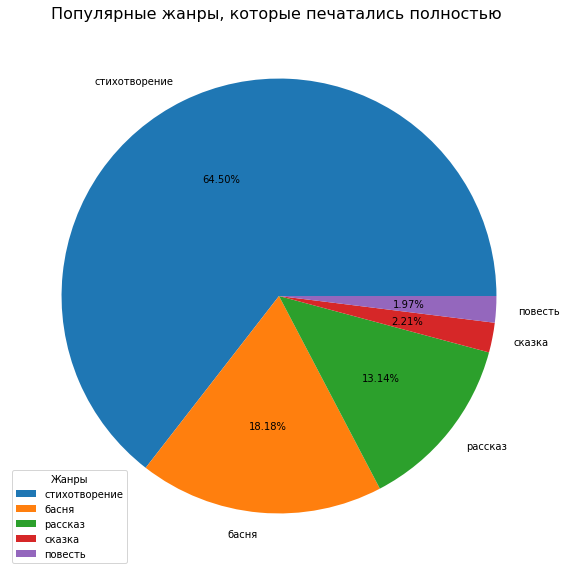

In [58]:
data[data['whole'] == 'да']['genre'].value_counts().reset_index()

risk_level = data[data['whole'] == 'да']['genre'].value_counts()[0:5].index
fig, ax = plt.subplots(figsize=[15,10])
ax.pie(data[data['whole'] == 'да']['genre'].value_counts()[0:5], labels = risk_level, autopct='%.2f%%')
ax.set_title('Популярные жанры, которые печатались полностью ', fontsize=16)
ax.legend(title = 'Жанры')
# sns.color_palette("blend:#EDA", as_cmap=True)
plt.show()

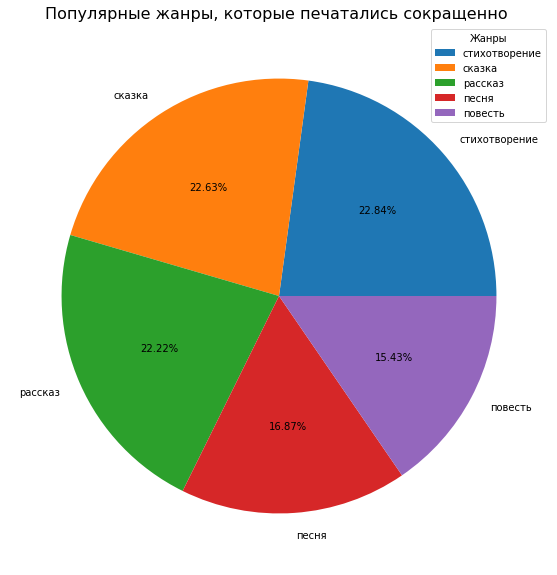

In [265]:
data[data['whole'] == 'нет']['genre'].value_counts().reset_index()

risk_level = data[data['whole'] == 'нет']['genre'].value_counts()[0:5].index
fig, ax = plt.subplots(figsize=[15,10])
ax.pie(data[data['whole'] == 'нет']['genre'].value_counts()[0:5], labels = risk_level, autopct='%.2f%%')
ax.set_title('Популярные жанры, которые печатались cокращенно ', fontsize=16)
ax.legend(title = 'Жанры')
# sns.color_palette("blend:#EDA", as_cmap=True)
plt.show()

In [268]:
data.isna().sum()

Unnamed: 0               0
author                 310
gender                 570
text                     0
title_of_textbook     1922
kind_of_literature      41
year                   576
genre                  476
whole                  553
retelling              491
start_of_textbook     1912
 compiler                5
place_of_edition         5
year_of_edition          5
level_of_education    1181
kind_of_book             5
part_of_edition        763
notes                 2206
biblio_id             2280
peers_authors            0
dtype: int64

# Рига и другие города

In [60]:
riga = data[data['place_of_edition'] == 'Рига']
other = data[data['place_of_edition'] != 'Рига']

In [61]:
# чем в целом отличаются?
for i in riga.columns:
    if i not in ['author', 'text', 'title_of_textbook', 'start_of_textbook', 'place_of_edition', 'year_of_edition', 'part_of_edition', 'notes'] and len(set(riga[i].value_counts().index) & set(other[i].value_counts().index)) != len(riga[i].value_counts().index):
        print(f"Столбец: {i.upper()}")
        print(f"пересечение: {len(set(riga[i].value_counts().index) & set(other[i].value_counts().index))}")
        print(f"чем рига отличается: {', '.join(riga[riga[i].isin(set(riga[i].value_counts().index) - set(other[i].value_counts().index))][i].value_counts()[0:20].index.astype(str))}")
        print('________________________')

Столбец: UNNAMED: 0
пересечение: 0
чем рига отличается: 2047, 2273, 2093, 2106, 2050, 2155, 2246, 2257, 2276, 2184, 2164, 2279, 2272, 2253, 2083, 2199, 2168, 2097, 2186, 2159
________________________
Столбец: KIND_OF_LITERATURE
пересечение: 4
чем рига отличается: критика
________________________
Столбец: YEAR
пересечение: 111
чем рига отличается: 1832, 1864, 1877, 1888, 1824, 1829, 186?, 1925, 1868, 1870, 1902, 1822, 188?, 1929, 1821, 1920, 1845, 1844, 1904, 1933
________________________
Столбец: GENRE
пересечение: 26
чем рига отличается: воспоминания, эссе, критика, сатира, пьеса, исторический труд, история, сказ, драматическая поэма, стихотворения, апокриф
________________________
Столбец:  COMPILER
пересечение: 0
чем рига отличается: Н. Гудков, Е. М. Тихоницкий, Е. А. Андреева, Т. М. Максимович, В. Д. Осмоловский, Н. Гудков, А. Иовлев, Е. Арронет
________________________


In [62]:
# cколько уникальных авторов в риге
len(riga['author'].unique())

232

In [63]:
# одинаковые авторы в риге и в других - 82 человека 
len(set(riga['author'].value_counts().index) & set(other['author'].value_counts().index))

83

In [66]:
# каких авторов печатали только в риге? - топ-20

riga[riga['author'].isin(set(riga['author'].value_counts().index) - set(other['author'].value_counts().index))]['author'].value_counts().reset_index().to_excel('писатели')

,index,author
0,Григорович Д.В.,11
1,Немирович-Данченко В.И.,8
2,Есенин С.А.,6
3,Островский А.Н.,5
4,Греков Н.П.,5
...,...,...
144,Короленко В.,1
145,Никитин И.,1
146,Оболенский Л.Е.,1
147,Радич,1


In [455]:
# cколько уникальных произведений в риге
len(riga['text'].unique())

1147

In [456]:
# одинаковые произведения в риге и в других - 198
len(set(riga['text'].value_counts().index) & set(other['text'].value_counts().index))

198

In [461]:
# каких произведения печатали только в риге? - топ-20

riga[riga['text'].isin(set(riga['text'].value_counts().index) - set(other['text'].value_counts().index))][['text', 'author']].value_counts()[0:20]

text                                         author          
Саша                                         Некрасов Н.А.       7
Сказка о мертвой царевне и о семи богатырях  Пушкин А.С.         5
песни бытовые                                фольклор            4
Лето Господне                                Шмелев И.С.         4
Бежин луг                                    Тургенев И.С.       4
Борис Годунов                                Пушкин А.С.         4
Осел и соловей                               Крылов И.А.         4
Недоросль                                    Фонвизин Д.И.       3
Малиновая вода                               Тургенев И.С.       3
Трудолюбивый медведь                         Крылов И.А.         3
Кому на Руси жить хорошо                     Некрасов Н.А.       3
Школа                                        Михайлов А.К.       3
Гуттаперчивый мальчик                        Григорович Д.В.     3
Капитанская дочка                            Пушкин А.С.         3


# Периоды годы

In [413]:
first = data[(data['year_of_edition'] >= 1918) & ((data['year_of_edition'] > 1930))]

In [416]:
second = data[(data['year_of_edition'] >= 1930) & ((data['year_of_edition'] >= 1938))]

# топ авторов 1918-1930, 1930-1938

In [422]:
# топ 1918-1930
first['author'].value_counts()[0:20]

фольклор              114
Толстой Л.Н.           30
Пушкин А.С.            30
Ушинский К.Д.          26
Крылов И.А.            23
Державин Г.Р.          18
Лермонтов М.Ю.         15
Плещеев А.Н.           14
Чехов А.П.             12
Некрасов Н.А.          12
Никитин И.С.           10
Майков А.Н.             9
Мамин-Сибиряк Д.Н.      9
Бальмонт К.Д.           9
Блок А.А.               8
Кольцов А.В.            8
Толстой А.К.            8
Тургенев И.С.           8
Сумароков А.П.          7
Гоголь Н.В.             7
Name: author, dtype: int64

In [423]:
# топ 1930-1938
second['author'].value_counts()[0:20]

фольклор                   37
Толстой Л.Н.               16
Плещеев А.Н.               11
Крылов И.А.                11
Ушинский К.Д.              10
Некрасов Н.А.              10
Чехов А.П.                 10
Мамин-Сибиряк Д.Н.          8
Никитин И.С.                7
Шмелев И.С.                 7
Пушкин А.С.                 7
Чириков Е.Н.                6
Бальмонт К.Д.               6
Лебедев                     5
Немирович-Данченко В.И.     5
Кольцов А.В.                4
Коринфский А.               4
Блок А.А.                   4
Тургенев И.С.               4
Спрудж А.                   4
Name: author, dtype: int64

In [430]:
# одинаковые писатели в 2 периодах - ВСЕ ПИСАТЕЛИ 2 ПЕРИОДА ЕСТЬ В 1 ПЕРИОДЕ
pd.Series(list(set(second['author'].value_counts().index) & set(first['author'].value_counts().index)))

0                    Блок А.А.
1      Немирович-Данченко В.И.
2                 Суриков И.З.
3               Насимович А.Ф.
4                 Толстой А.К.
                ...           
109          Мережковский Д.С.
110         Мамин-Сибиряк Д.Н.
111             Чумаченко А.А.
112               Никитин И.С.
113               Клокова М.П.
Length: 114, dtype: object

In [443]:
# писатели, появившиеся только в 1 периоде - делаю из них топ! 
first[first['author'].isin(list(set(first['author'].value_counts().index) - set(second['author'].value_counts().index)))]['author'].value_counts()[0:20]

Державин Г.Р.     18
Ломоносов М.В.     7
Сумароков А.П.     7
Нестор             5
Фонвизин Д.И.      4
Дмитриев И.И.      3
Хемницер И.И.      3
Петр I             3
Замойский П.И.     3
Фофанов К.М.       2
Ржевский А.А.      2
Михайлов А.К.      2
Карамзин Н.М.      2
Екатерина II       2
Болотов            2
Мирович            2
Бостром            2
Шишков А.С.        2
Короленко В.Г.     2
Херасков М.М.      1
Name: author, dtype: int64

# топ произведений 1918-1930, 1930-1938

In [462]:
first['text'].value_counts()[0:20]

Илья Муромец                                   7
Сказка о мертвой царевне и о семи богатырях    5
Евгений Онегин                                 5
Степь                                          5
Лето Господне                                  4
Мертвые души                                   4
Обломов                                        4
Колыбельная песня                              3
Елочка                                         3
Оля                                            3
Детство                                        3
Записки из мертвого дома                       3
Кому на Руси жить хорошо?                      3
Пасха                                          3
Мороз Красный нос                              3
Осень                                          3
Кто это?                                       3
Песня пахаря                                   2
Крестьянские дети                              2
Помощники                                      2
Name: text, dtype: i

In [463]:
# топ 1930-1938
second['text'].value_counts()[0:20]

Степь                        5
Лето Господне                4
Осень                        3
Оля                          3
Илья Муромец                 3
Зимний вечер                 2
Беглец                       2
Кто это?                     2
Крестьянские дети            2
Зимняя дорога                2
Весенние грозы               2
Кому на Руси жить хорошо?    2
Обломов                      2
Мороз Красный нос            2
Записки из мертвого дома     2
Детство                      2
Елочка                       2
Колыбельная песня            2
Дома                         2
Помощники                    2
Name: text, dtype: int64

In [464]:
# одинаковые произведения в 2 периодах - ВСЕ ПРОИЗВЕДЕНИЯ 2 ПЕРИОДА ЕСТЬ В 1 ПЕРИОДЕ
pd.Series(list(set(second['text'].value_counts().index) & set(first['text'].value_counts().index)))

0          Зимняя ночь в дервене
1                      Помощники
2                      На базаре
3             Школьный спектакль
4                        Журавль
                 ...            
312             Как Комар убился
313                       Гадюка
314                        Рыбка
315    Казачья колыбельная песня
316                 Светлый день
Length: 317, dtype: object

In [468]:
# произведения, появившиеся только в 1 периоде - делаю из них топ! 
first[first['text'].isin(list(set(first['text'].value_counts().index) - set(second['text'].value_counts().index)))][['text', 'author']].value_counts()[0:20].to_frame()

,,0
text,author,
Мертвые души,Гоголь Н.В.,4
Смерть Олега,Нестор,2
"За рекою, за быстрою",фольклор,2
Война и мир,Толстой Л.Н.,2
Школа,Михайлов А.К.,2
Летопись Нестора,Нестор,2
Садко богатый гость,фольклор,2
Слово о полку Игореве,фольклор,2
Бирюк,Тургенев И.С.,2
